# Some Examples of Statistics Distributions

In this notebook we are showing some examples of statistics distributions.

A full list of the statistical distributions available in ROOT is in the reference guide at 
https://root.cern.ch/doc/master/group__StatFunc.html

In [1]:
TF1 * f; 
TF2 * f2;
TH1 * h; 
gStyle->SetOptStat(110001100);
int ngen = 1000000;
TRandom3 * rndm = new TRandom3(0);

## Normal Distribution

$$ p(x) = {1 \over \sqrt{2 \pi \sigma^2}} e^{-x^2 / 2\sigma^2} $$

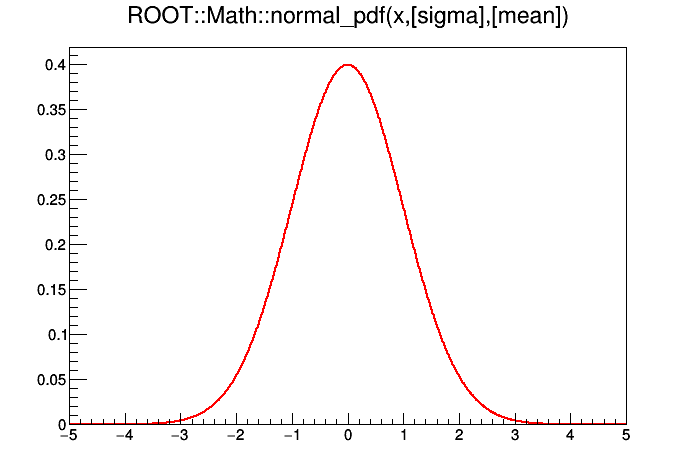

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [2]:
f = new TF1("pdf","ROOT::Math::normal_pdf(x,[sigma],[mean])",-5,5);
f->SetParameter("mean",0);
f->SetParameter("sigma",1);
f->SetNpx(1000);
f->Draw();
gPad->Draw();

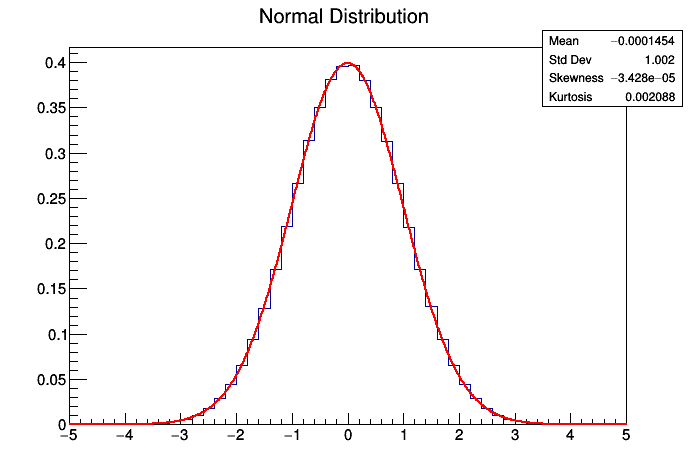

In [3]:
h = new TH1D("hg","Normal Distribution",50,-5,5);
for (int i = 0; i < ngen; ++i)
    h->Fill(rndm->Gaus(0,1));

h->Scale(1./h->Integral(),"width");
h->Draw("HIST");
f->Draw("SAME");
gPad->Draw();

## Log-Normal Distribution

$$ p(x) = {1 \over x \sqrt{2 \pi s^2} } e^{-(\ln{x} - m)^2/2 s^2} $$

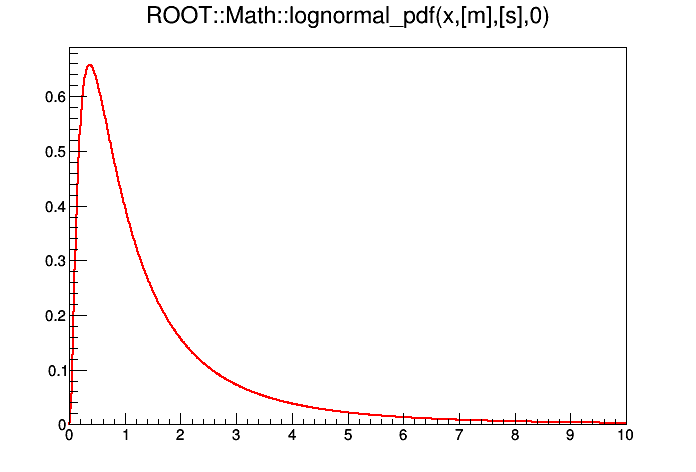

Log-normal median = 1
Log-normal mu = 1.64872


In [4]:
f = new TF1("pdf","ROOT::Math::lognormal_pdf(x,[m],[s],0)",0,10);
f->SetNpx(1000);
f->SetParameter("m",0);
f->SetParameter("s",1);
f->Draw();

gPad->Draw();
std::cout << "Log-normal median = " << exp(f->GetParameter("m")) << std::endl;
std::cout << "Log-normal mu = " << exp(f->GetParameter("m") + 0.5*TMath::Power(f->GetParameter("s"),2)) << std::endl;

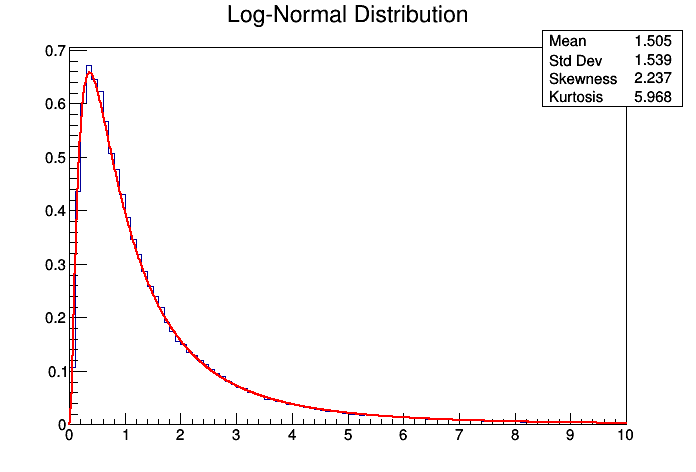

In [5]:
h = new TH1D("hln","Log-Normal Distribution",100,0,10);
h->FillRandom("pdf",100000);
h->Scale(1./h->Integral(),"width");
h->Draw("HIST");
f->Draw("SAME");
gPad->Draw();

## Poisson Distribution

$$p(n) = \frac{\mu^n}{n!} e^{- \mu} $$

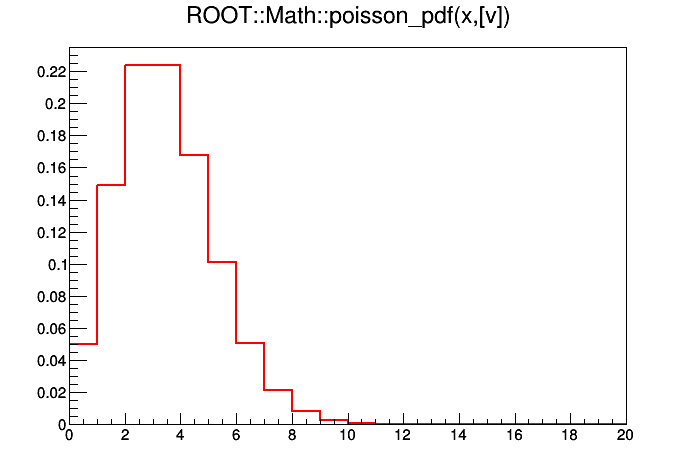

In [6]:
f = new TF1("f","ROOT::Math::poisson_pdf(x,[v])",0,20);
f->SetNpx(20);
f->SetParameter("v",3);
f->Draw("HIST");
gPad->Draw();

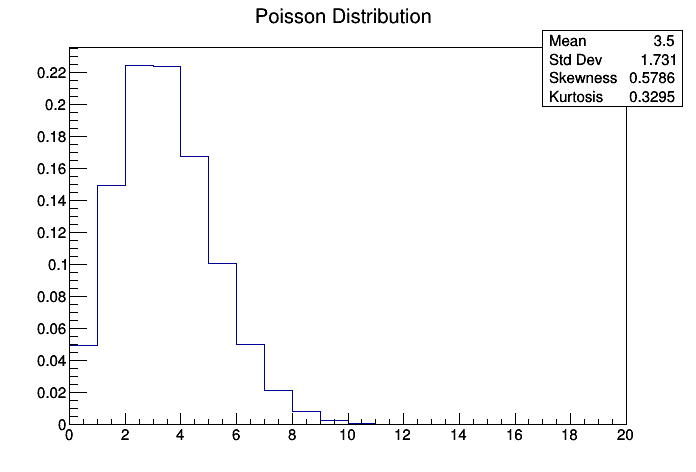

In [7]:
h = new TH1D("hpoi","Poisson Distribution",20,0,20);
for (int i = 0; i < ngen; ++i)
    h->Fill(rndm->Poisson(3));

h->Scale(1./h->Integral(),"width");
h->Draw("HIST");
gPad->Draw();

## Binomial Distribution

$$ p(k) = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k} $$

In [8]:
//%jsroot on

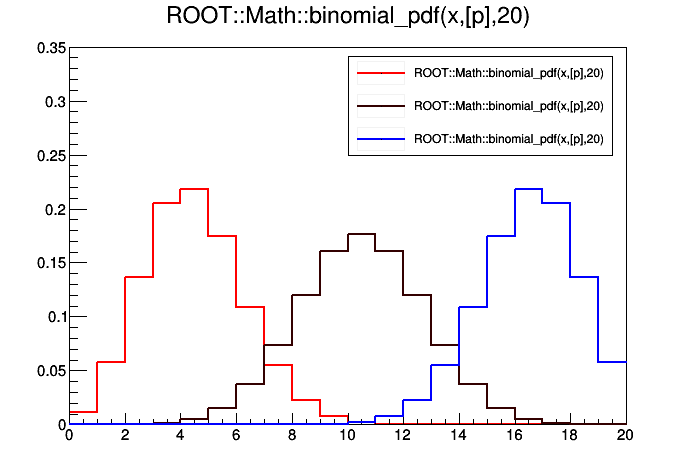

In [9]:
f = new TF1("f","ROOT::Math::binomial_pdf(x,[p],20)",0,20);
f->SetNpx(20);
f->SetParameter("p",0.2);
f->SetMaximum(0.35);
f->GetHistogram()->Draw("HIST");
fb2 = (TF1*) f->Clone("f2");
fb2->SetParameter("p",0.5);
fb2->SetLineColor(kRed+4);
fb2->GetHistogram()->Draw("SAME HIST");
fb3 = (TF1*) f->Clone("f2");
fb3->SetParameter("p",0.8);
fb3->SetLineColor(kBlue);
fb3->GetHistogram()->Draw("SAME HIST");
gPad->BuildLegend();
gPad->Draw();

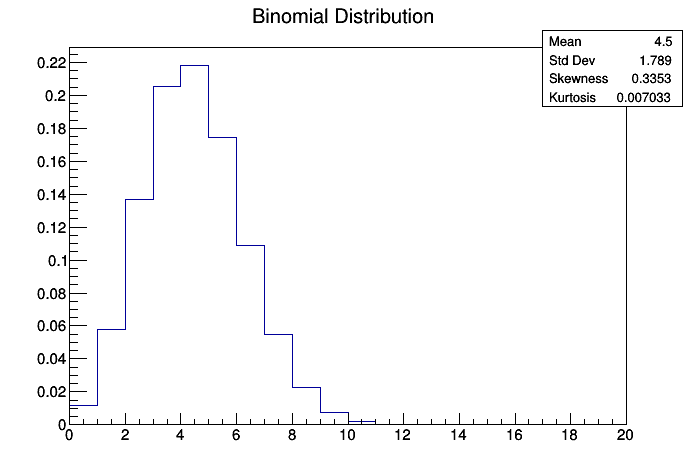

In [10]:
h = new TH1D("hbin","Binomial Distribution",20,0,20);
for (int i = 0; i < ngen; ++i)
    h->Fill(rndm->Binomial(20,0.2));

h->Scale(1./h->Integral(),"width");
h->Draw("HIST");
//f->GetHistogram()->Draw("SAME");
gPad->Draw();

## Bi-Variate Gaussian Distribution

$$ p(x) = {1 \over 2 \pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp (-(x^2/\sigma_x^2 + y^2/\sigma_y^2 - 2 \rho x y/(\sigma_x\sigma_y))/2(1-\rho^2)) $$

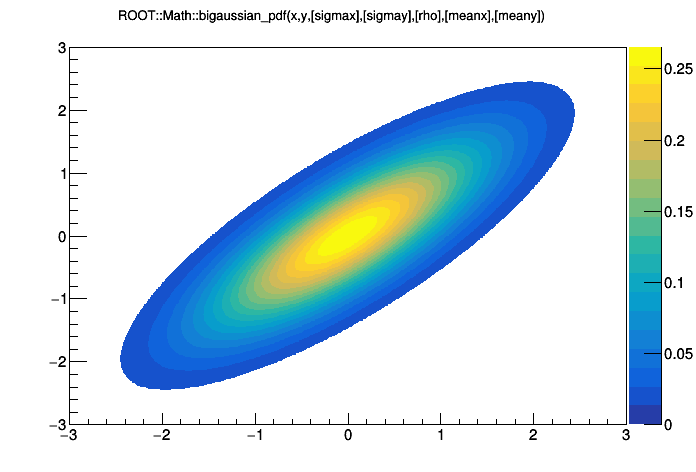

In [11]:
f2 = new TF2("f2","ROOT::Math::bigaussian_pdf(x,y,[sigmax],[sigmay],[rho],[meanx],[meany])",-3,3,-3,3);
f2->SetNpx(200); f2->SetNpy(200);
f2->SetParameter("sigmax",1); f2->SetParameter("sigmay",1);
f2->SetParameter("meanx",0); f2->SetParameter("meany",0);
f2->SetParameter("rho",0.8);
f2->Draw("CONT Z");
gPad->Draw();

If we decompose the Covariance matrix in a product of triangular matrix $C = U^T U$, one can easly proof that if $v$ is a vector of normal distributed numbers $N(0,1)$, the vector $U v$ will be distributed with a multi-gaussian with $C$ as covariance matrix. 

In [12]:
double covmat[] = { 1, 0.8, 0.8, 1};
TMatrixDSym CovMatrix(2,covmat);
CovMatrix.Print(); 

// we decompose the matrix with a triangular matrix  $C = U^T U$
TDecompChol chol(CovMatrix);
chol.Decompose(); 
TMatrixD U = chol.GetU(); 
TMatrixD UT(2,2); UT.Transpose(U); 
UT.Print();


2x2 matrix is as follows

     |      0    |      1    |
-------------------------------
   0 |          1         0.8 
   1 |        0.8           1 


2x2 matrix is as follows

     |      0    |      1    |
-------------------------------
   0 |          1           0 
   1 |        0.8         0.6 



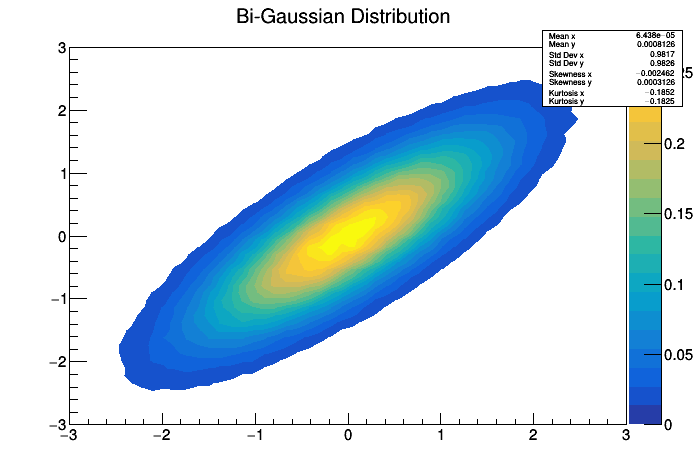

In [13]:
h2 = new TH2D("h2g","Bi-Gaussian Distribution",50,-3,3,50,-3,3);
for (int i = 0; i < ngen; ++i){
    double u = rndm->Gaus(0,1);
    double v = rndm->Gaus(0,1);
    double x = u; 
    double y = UT(1,0)*u + UT(1,1)*v;
    h2->Fill( x, y);
}
    
//    h2->FillRandom("f2");

h2->Scale(1./h2->Integral(),"width");
h2->Draw("CONT Z");
gPad->Draw();